# Wine Quality Prediction

### For White Wine Dataset

### Algorithm used: Decision Trees

Dataset source: https://archive.ics.uci.edu/ml/datasets/wine+quality

This jupyter notebook is a part of the blog https://mldoodles.com/wine-quality-prediction/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [2]:
data_white = pd.read_csv("winequality-white.csv", sep=";")

In [3]:
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print("There are {} rows and {} columns".format(data_white.shape[0], data_white.shape[1]))

There are 4898 rows and 12 columns


### Check for null values

In [5]:
data_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Plot Histogram - To see how much data in each quality

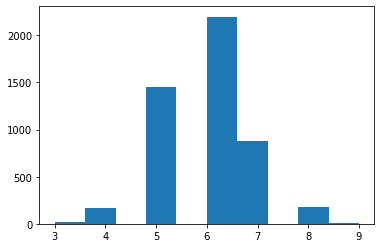

In [6]:
plt.hist(data_white["quality"])
plt.show()

In [7]:
data_white["quality"].groupby(data_white["quality"]).count()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

### Analyze correlation using heatmap

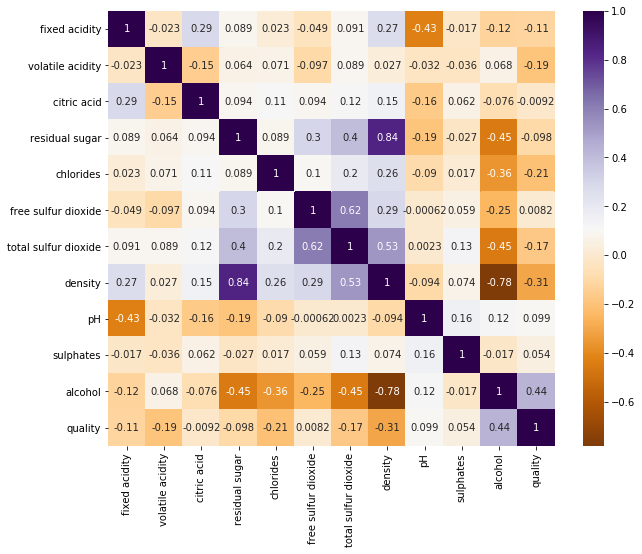

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data_white.corr(), annot=True, cmap="PuOr")
plt.show()

### Split data into two categories

Add a new column "good_quality" and number it as 0 or 1.

Quality 1 to 6 => "good_quality":0

Quality 7 to 10 => "good_quality":1

In [9]:
data_white["good_quality"] = [0 if i<7 else 1 for i in data_white["quality"]]

In [10]:
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [11]:
data_white["good_quality"].groupby(data_white["good_quality"]).count()

good_quality
0    3838
1    1060
Name: good_quality, dtype: int64

### Split features and label

In [12]:
y = data_white["good_quality"]
X = data_white.drop(["good_quality", "quality"], axis=1)

### Normalize the features

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Split training set and testing set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [15]:
print("Number of samples in training set:", X_train.shape[0])
print("Number of samples in testing set:", X_test.shape[0])

Number of samples in training set: 3673
Number of samples in testing set: 1225


### Model building

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

### Model Fitting

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Model Prediction

In [18]:
y_pred = model.predict(X_test)

### Calculate score

In [19]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print("Accuracy", score)

Accuracy 0.8228571428571428


### View the results

In [20]:
results_series = {"actual":y_test, "predicted":y_pred}
results = pd.DataFrame(results_series)
print("*** First 5 rows of results ***")
results.head()

*** First 5 rows of results ***


,actual,predicted
2762,0,0
42,0,0
1419,1,0
3664,1,1
2125,0,0


### Analyze feature importances

In [21]:
s = {'col1':X.columns, 'col2':model.feature_importances_}
df = pd.DataFrame(s)
df_sorted = df.sort_values('col2')

In [22]:
df

,col1,col2
0,fixed acidity,0.062287
1,volatile acidity,0.094493
2,citric acid,0.060456
3,residual sugar,0.066844
4,chlorides,0.066065
5,free sulfur dioxide,0.080450
6,total sulfur dioxide,0.064997
7,density,0.068100
8,pH,0.113520
9,sulphates,0.085585


In [23]:
df_sorted

,col1,col2
2,citric acid,0.060456
0,fixed acidity,0.062287
6,total sulfur dioxide,0.064997
4,chlorides,0.066065
3,residual sugar,0.066844
7,density,0.068100
5,free sulfur dioxide,0.080450
9,sulphates,0.085585
1,volatile acidity,0.094493
8,pH,0.113520


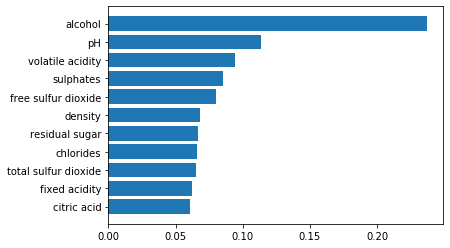

In [24]:
plt.barh(df_sorted["col1"], df_sorted["col2"])
plt.show()